In [492]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import time

In [493]:
# partice pro perties and constants
scale = 1e-12
mass = 9.109e-31
hbar = 6.626e-34
charge = -1.602e-19
N = 128

In [494]:
def potential(v):
    
    k= 9*10**9
    q1 = 1.602e-19
    x1 = 40
    y1 = 40
    q2 = 1.602e-19
    x2 = 65
    y2 = 100
    q3 = 1.602e-19
    x3 = 100
    y3 = 60
                
    for i in range(N):
        for j in range(N):
            r1 = ((i-x1)**2+(j-y1)**2)**.5 * scale
            r2 = ((i-x2)**2+(j-y2)**2)**.5 * scale
            r3 = ((i-x3)**2+(j-y3)**2)**.5 * scale
            if r1 != 0:
                v[i][j] = k * q1 / r1
            else:
                v[i][j] = k * q1 / scale
            if r2 != 0 :
                v[i][j] += k * q2 / r2 
            else:
                v[i][j] += k * q2 / scale
            if r3 != 0:
                v[i][j] += k * q3 / r3
            else:
                v[i][j] += k * q3 / scale
        
    return v

In [495]:
def lanczos(v0,m,q):
    #Writing Lanczos Algorithm
    #Initial Iteration
    w = []
    beta = [0]
    v = [v0]
    wp = []
    alpha = []
    w0p = Hx(v0, q, phi)
    wp.append(w0p)
    alpha0 = np.conj(w0p.T) @ v0
    alpha.append(alpha0)
    w0 = w0p - alpha0 * v0
    w.append(w0)
    #Repeated Iteration
    for j in range(1,m):
        betaj = np.linalg.norm(w[j-1])
        beta.append(betaj)
        vj = w[j-1]/beta[j]
        v.append(vj)
        wjp = Hx(v[j], q, phi)
        wp.append(wjp)
        alphaj = np.conj(wp[j].T) @ v[j]
        alpha.append(alphaj)
        wj = wp[j] - alpha[j] * v[j] - beta[j] * v[j-1]
        w.append(wj)   
        
    v = np.array(v)
    V = v.T
    Teigenvals, Teigenvecs = eigh_tridiagonal(alpha,beta[1:]) #tridiagonal matrix with alphas on main diagonal and betas on adjacent ones
    groundstate_eigenval = Teigenvals[0]
    groundstate_eigenvec = Teigenvecs[:,0]
    print(groundstate_eigenval)
    return V @ groundstate_eigenvec   
    
    
    

In [496]:
xy1 = np.mgrid[0:N,0:N]
xy = xy1.reshape(2,-1)
xp = np.roll(xy1,-1,axis=1).reshape(2,-1)
xm = np.roll(xy1,1,axis=1).reshape(2,-1)
yp = np.roll(xy1,-1,axis=2).reshape(2,-1)
ym = np.roll(xy1,1,axis=2).reshape(2,-1)

def Hx(x,q,phi):
   #Create discrete version of Hamiltonian operator
    x = x.reshape(int(np.sqrt(len(x))),-1)
    ax = np.zeros(x.shape)

    #Use discrete schrodinger equation
    ax[xy[0,:],xy[1,:]] = -hbar/(2*mass*scale*scale)*(-4*x[xy[0,:],xy[1,:]] + x[xp[0,:],xp[1,:]] + x[xm[0,:],xm[1,:]] +  x[yp[0,:],yp[1,:]] + x[ym[0,:],ym[1,:]])+q*phi[xy[0,:],xy[1,:]]*x[xy[0,:],xy[1,:]] 
    #reset boundary
    ax[0,:] = 0
    ax[:,0] = 0
    ax[N-1,:] = 0
    ax[:,N-1] = 0

    return ax.flatten()

    

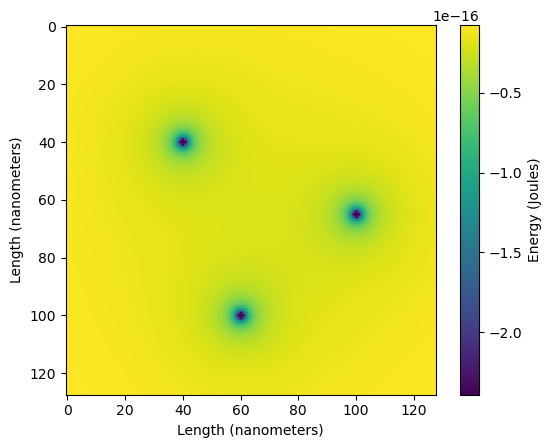

In [497]:
#Creating potential
phi = np.ones((N,N))
phi = potential(phi)
#Creating grid
plt.style.use('default')
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)
               
Z = charge * phi[X][Y]
fig, ax = plt.subplots()
#Plot Potential
plt.imshow(Z)
cbar = plt.colorbar()
cbar.set_label("Energy (Joules)")
plt.xlabel("Length (nanometers)")
plt.ylabel("Length (nanometers)")
plt.show()


In [498]:
#Create starting v0
v0 = np.ones((N,N))
v0 = potential(v0)
#for i in range(N):
#    for j in range(N):
#        if(i == 0 or i == N-1 or j == 0 or j == N-1):
#            v0[i][j] = 0
v0 = v0/np.linalg.norm(v0)
v0 = v0.flatten()

In [499]:
iterations = 200

t1 = time.time()
for i in range(iterations):
    result = lanczos(v0,10,charge)
    v0 = result/np.linalg.norm(result)
t2 = time.time()
print("Time taken: " + str(round(t2-t1,3)) + " seconds.")

1.4735607247136827e+18
5.926327788477699e+17
3.9355613535044243e+17
3.1074571891237856e+17
2.766114161524659e+17
2.421604240684054e+17
2.3186994729897005e+17
2.113452333148915e+17
2.0761826279252742e+17
1.933325391603615e+17
1.9192297688527856e+17
1.8089619142750774e+17
1.803372964980223e+17
1.710847487030928e+17
1.7086696140565808e+17
1.6246382883211507e+17
1.6244874110357664e+17
1.541434382429603e+17
1.543241482174709e+17
1.452891134138889e+17
1.4568482983014784e+17
1.3472907116374578e+17
1.3533979810230661e+17
1.2061519627962765e+17
1.2144084637162514e+17
1.0168642697123357e+17
1.0276694222133304e+17
8.303346693932723e+16
8.350983619039722e+16
6.9232970221873144e+16
6.885194287552806e+16
5.947147421070893e+16
5.8967227023255e+16
5.256438880615503e+16
5.202407665791795e+16
4.7270051437000296e+16
4.678152114702256e+16
4.300953493051901e+16
4.256302134045149e+16
3.942558151603374e+16
3.9021951168128296e+16
3.6312549166984136e+16
3.5953487632811444e+16
3.35462356626141e+16
3.32316964839

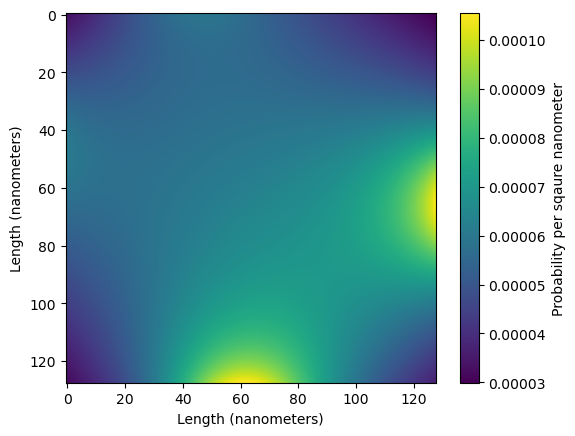

In [503]:
wavefunction = np.reshape(v0, (N,N))
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)
                   
wavefunction = wavefunction[X][Y]
fig, ax = plt.subplots()
#plot wavefunction squared to give probability plot
probability = wavefunction**2
norm = np.sum(probability)
probability = probability / norm
plt.imshow(probability)
cbar = plt.colorbar()
cbar.set_label("Probability per sqaure nanometer")
plt.xlabel("Length (nanometers)")
plt.ylabel("Length (nanometers)")
plt.show()